<a href="https://colab.research.google.com/github/sriharsha2004/AgroGuide/blob/main/Crop_yield_prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/yield_df.csv.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/yield_df.csv")

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.shape

(28242, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

# **Data Visualization**

In [ ]:
# Their are some strings which are in the form of numbers in the average_rain_fall_mm_per_year column
# We have to remove them
# And also their are certain integers , we have to covert them onto the floating point values


# def isStr(obj):
#     try:
#         float(obj)
#         return False
#     except:
#         print("Of type string")
#         return True
# to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

# **Area vs frequency**

In [ ]:
len(df['Area'].unique())

101

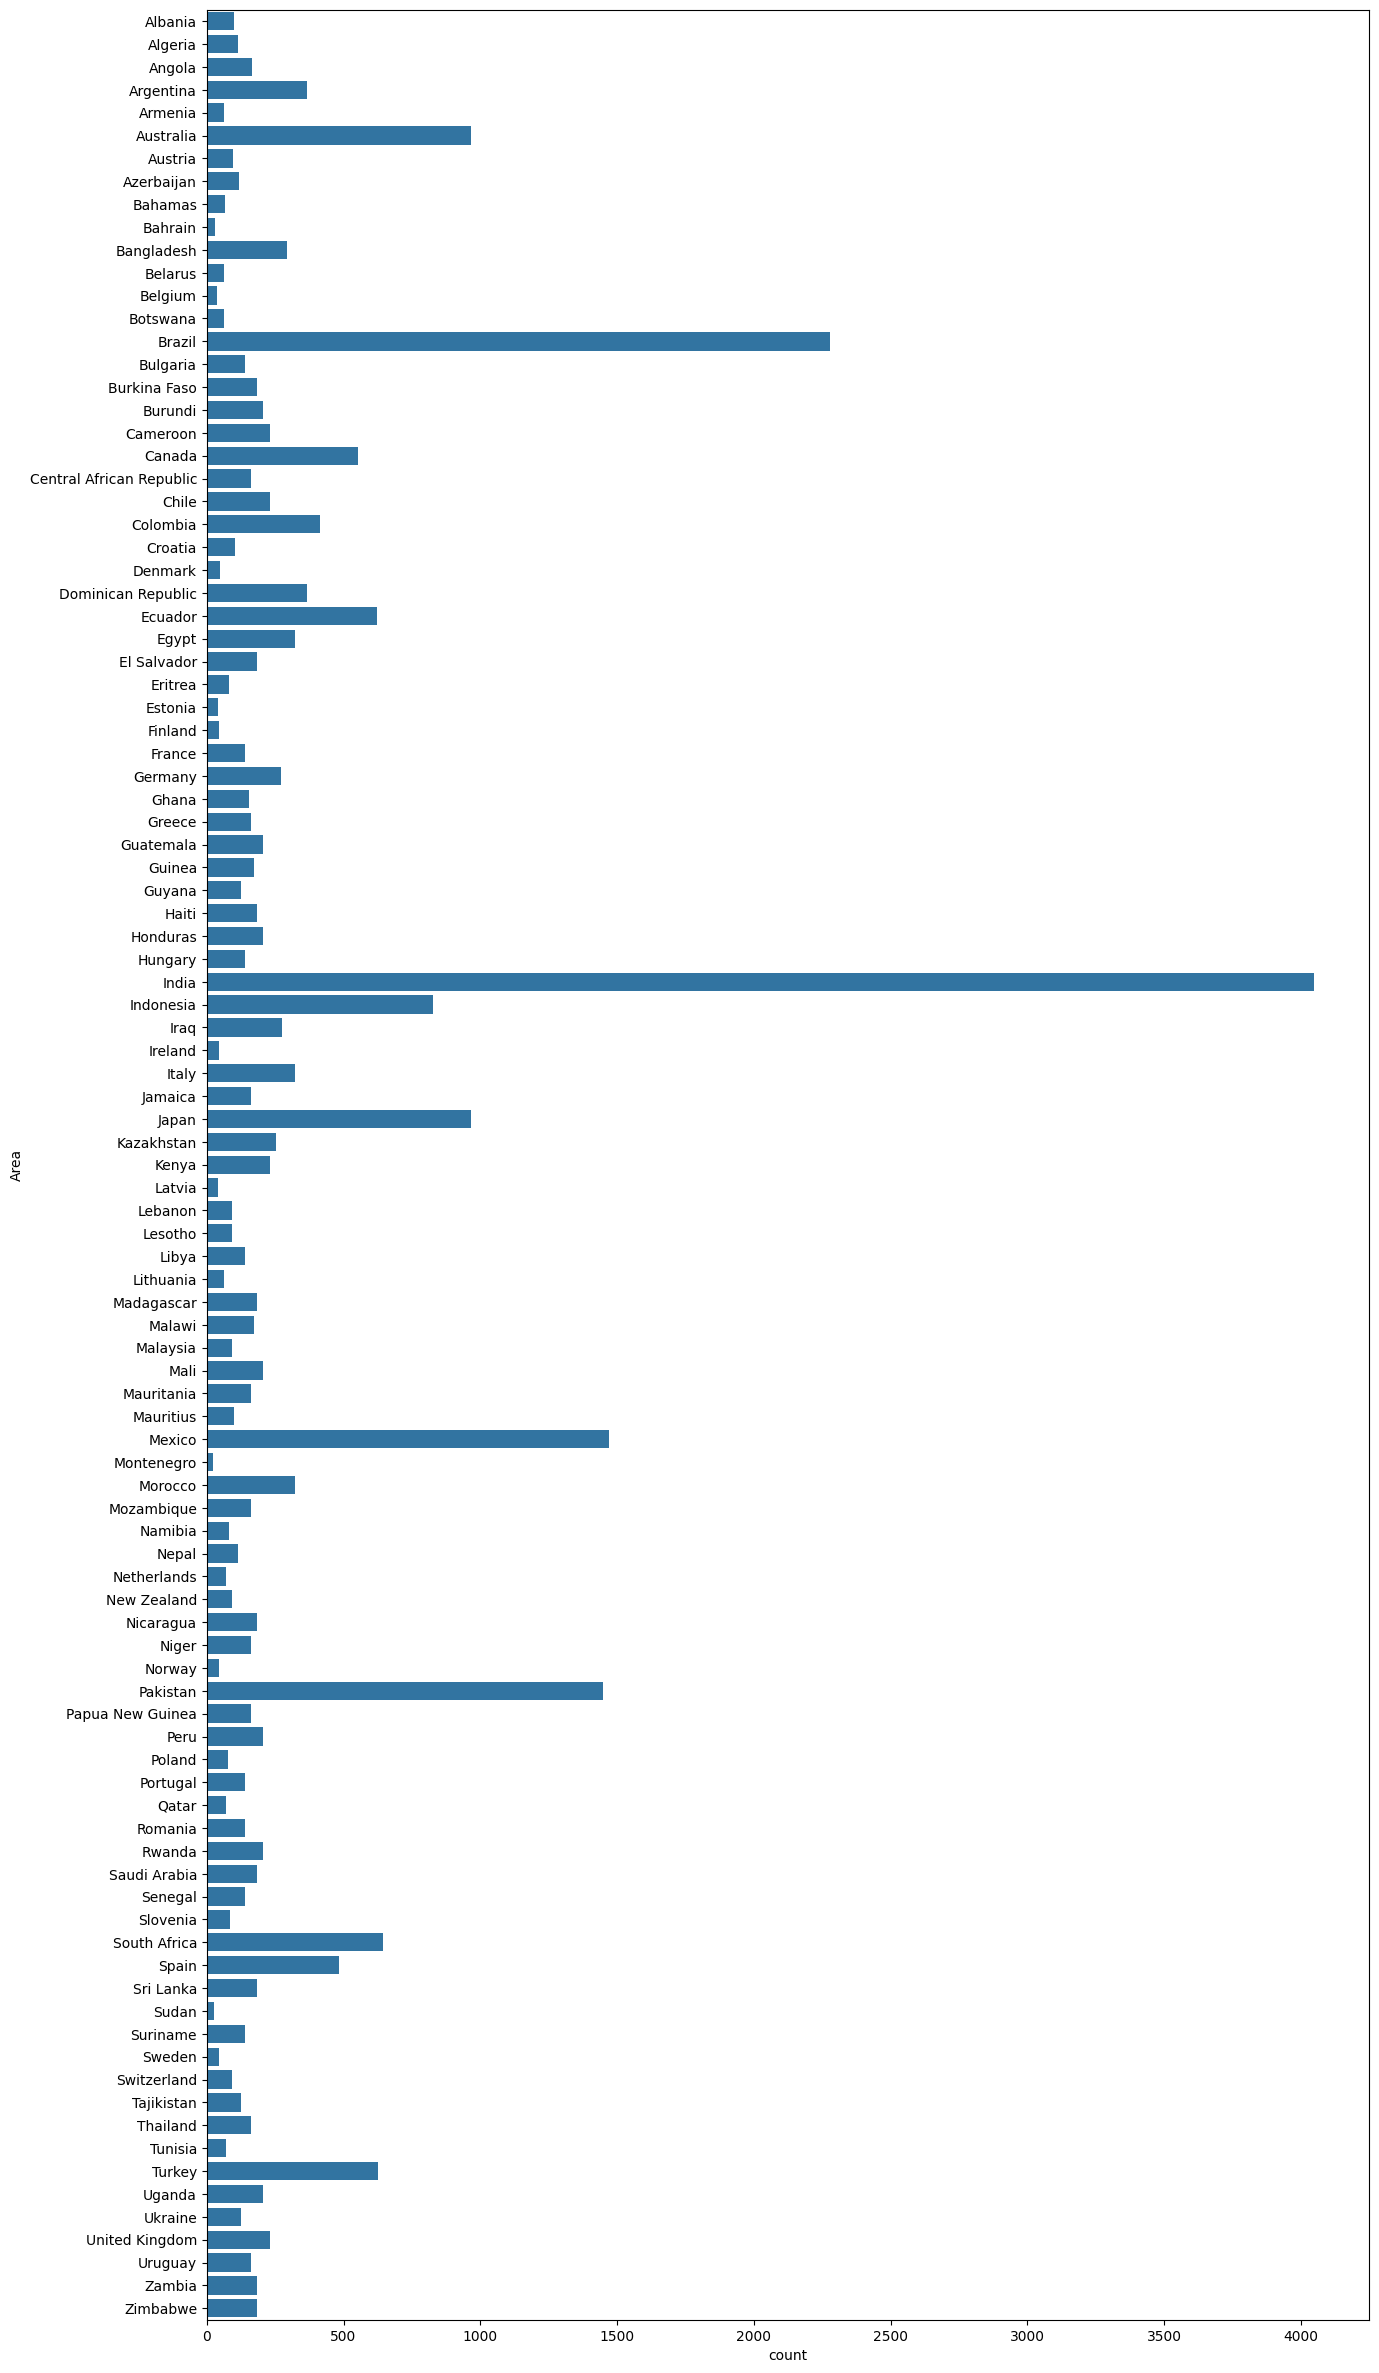

In [ ]:
plt.figure(figsize=(15,30))
sns.countplot(y=df["Area"]);
plt.show()

# **yield_per_country**

In [ ]:
df.head()
# for finding yield of country , we have to sum up the yields of all types of Items like Maize,tomato,..
# And then after we can plot a bar plot showing name of country with the total yield i.e total sum

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df["Area"].unique()
# Unique area

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [ ]:
yield_per_country = []
for area in df["Area"].unique():
  # print(area)
  # getting the yield for every crop of a particular area and finding the sum of all the crops
  yield_per_country.append(df[df["Area"] == area]["hg/ha_yield"].sum())

In [ ]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 15440318,
 4704812,
 8442270,
 470651,
 167550306,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 327420324,
 69193506,
 10984722,
 9104030,
 32280700,
 19698007,
 124470912,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 130788528,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 73897434,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 41333132,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,


<Axes: >

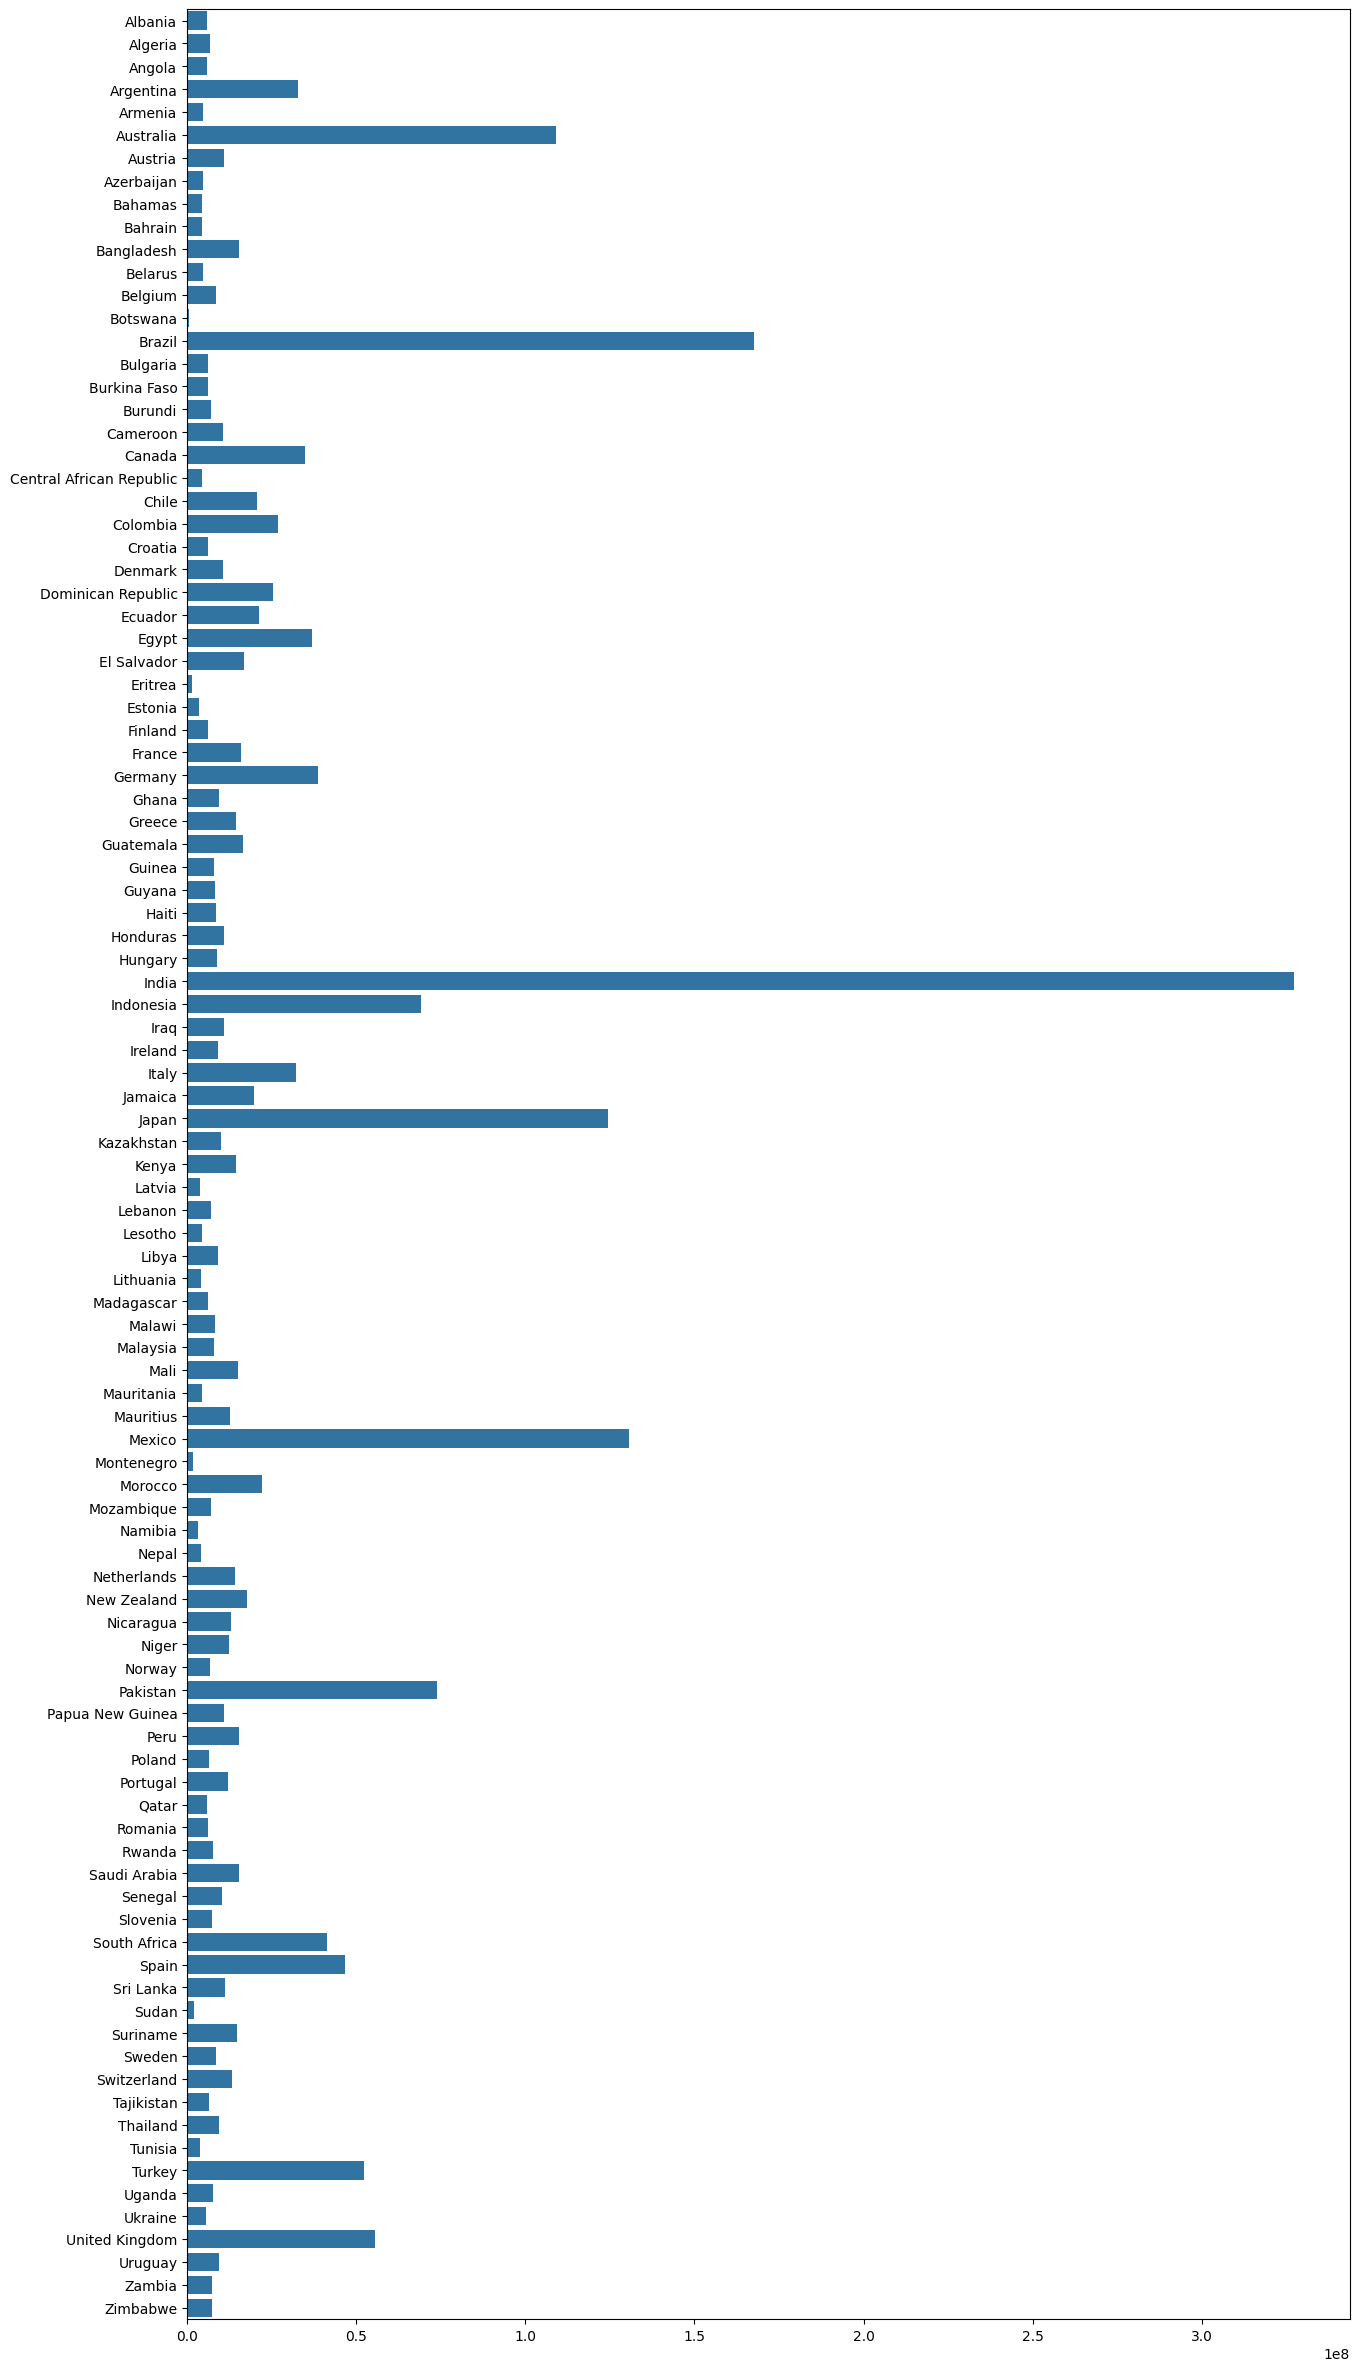

In [ ]:
plt.figure(figsize=(15,30))
sns.barplot(y=df["Area"].unique(),x=yield_per_country)

# **Items Frequency**

<Axes: xlabel='count', ylabel='Item'>

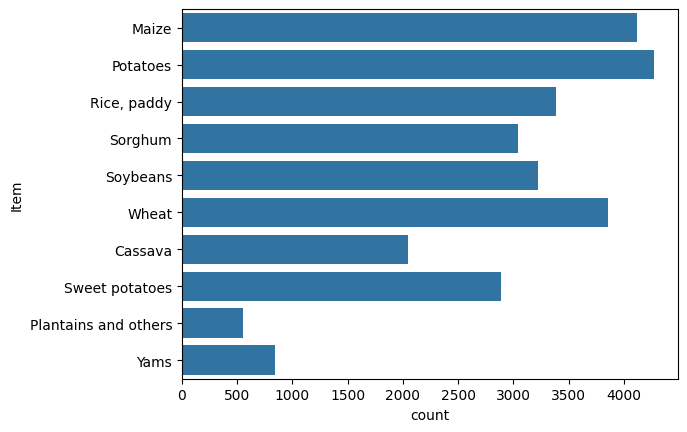

In [ ]:
sns.countplot(df["Item"])

# **Item Vs Yield**

In [ ]:
# Finding the Items , and adding yields for that Item irrespective of the Area
df["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [ ]:
yield_per_crop = [];

crops = df["Item"].unique()
for crop in crops :
  yield_per_crop.append(df[df["Item"] == crop]["hg/ha_yield"].sum())

In [ ]:
yield_per_crop

[149633801,
 854351426,
 137994713,
 56634127,
 53924312,
 116158445,
 307730510,
 344077024,
 58958974,
 96676873]

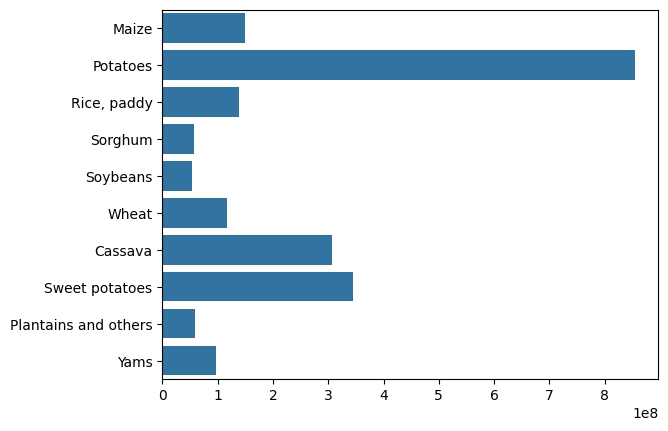

In [ ]:
sns.barplot(y=crops,x=yield_per_crop)
plt.show()

# **Data preprocessing**

In [ ]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# **Converting Categorical to Numerical values and Scaling Using column Transformer**

In [ ]:
# df.head()

In [ ]:
# defining a column Transformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder();
scalar = StandardScaler();

preprocessor = ColumnTransformer(
    transformers = [
        ("onehotencoding" , ohe , [4,5]),
        ("scaling" , scalar , [0,1,2,3] )
    ],
    remainder = "passthrough"
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoding', OneHotEncoder(), [4, 5]),
                                ('scaling', StandardScaler(), [0, 1, 2, 3])])

In [ ]:
# Applying this column transformer on our data

X_train_data = preprocessor.fit_transform(X_train);
X_test_data = preprocessor.transform(X_test)


In [ ]:
X_train_data

<22593x115 sparse matrix of type '<class 'numpy.float64'>'
	with 135558 stored elements in Compressed Sparse Row format>

In [ ]:
preprocessor.get_feature_names_out()
# Features present in the new data

array(['onehotencoding__Area_Albania', 'onehotencoding__Area_Algeria',
       'onehotencoding__Area_Angola', 'onehotencoding__Area_Argentina',
       'onehotencoding__Area_Armenia', 'onehotencoding__Area_Australia',
       'onehotencoding__Area_Austria', 'onehotencoding__Area_Azerbaijan',
       'onehotencoding__Area_Bahamas', 'onehotencoding__Area_Bahrain',
       'onehotencoding__Area_Bangladesh', 'onehotencoding__Area_Belarus',
       'onehotencoding__Area_Belgium', 'onehotencoding__Area_Botswana',
       'onehotencoding__Area_Brazil', 'onehotencoding__Area_Bulgaria',
       'onehotencoding__Area_Burkina Faso',
       'onehotencoding__Area_Burundi', 'onehotencoding__Area_Cameroon',
       'onehotencoding__Area_Canada',
       'onehotencoding__Area_Central African Republic',
       'onehotencoding__Area_Chile', 'onehotencoding__Area_Colombia',
       'onehotencoding__Area_Croatia', 'onehotencoding__Area_Denmark',
       'onehotencoding__Area_Dominican Republic',
       'onehotencodin

# **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# defining the set of models to select the best of all

from sklearn.metrics import mean_absolute_error , r2_score



In [ ]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor(),
    'rf' : RandomForestRegressor(n_estimators = 100)
}
for name, md in models.items():
    md.fit(X_train_data,y_train)
    y_pred = md.predict(X_test_data)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29260.997496284977 score : 0.7597275904499619
lss : mae : 29238.605305464414 score : 0.7596932604399246
Rid : mae : 29219.20713740565 score : 0.7595527333189708
Dtr : mae : 3695.362187997876 score : 0.9814739192883063
rf : mae : 3492.0113683837844 score : 0.9888436976362337


In [ ]:
# Random forest became the best model out of all

# **Grid Search CV for randomForest**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { "n_estimators" : [i for i in range(1,100)]}

grid = GridSearchCV(RandomForestRegressor(),param_grid, n_jobs=-1)

grid.fit(X_train_data, y_train)

print(grid.best_score_ , grid.best_params_)

Estimator= grid.best_params_.get("n_estimators")

print(Estimator)

In [ ]:
model=RandomForestRegressor(n_estimators=5)
model.fit(X_train_data,y_train)
model.score(X_test_data,y_test)

0.9850248342894378

In [ ]:
model=RandomForestRegressor(n_estimators=Estimator)
model.fit(X_train_data,y_train_data)
model.score(x_test,y_test)

# **Prediction**

In [ ]:
df.sample(5)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
20783,2013,346.0,13697.00,18.79,Morocco,"Rice, paddy",75433
21603,2006,151.0,21.12,29.78,Niger,"Rice, paddy",36637
19590,1999,758.0,34468.93,20.86,Mexico,Sorghum,29901
6146,1992,1342.0,0.04,24.81,Central African Republic,Plantains and others,26667
17579,2008,630.0,1578.00,16.66,Kenya,Wheat,25845


In [ ]:
def predict_yield(year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):

    # Create an array of the input features
    features = np.array([[year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]])

    # Applying tranformations present in column Transformer
    transformed_features = preprocessor.transform(features)

    # Make the prediction
    result = model.predict(transformed_features).reshape(1, -1)

    return result[0];

Year = 2013
average_rain_fall_mm_per_year =346.0
pesticides_tonnes = 13697.00
avg_temp = 18.79
Area = 'Morocco'
Item = 'Rice, paddy'
# Taking inputs

result = predict_yield(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
print(result)


[75433.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Pickle**

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [ ]:
!pip install --upgrade --force-reinstall scikit-learn

  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.0


In [ ]:
!pip cache purge

Files removed: 41


In [ ]:
df["Year"].max()

2013